# ITDS Final Project: Regression Models





- **full Name:** benmadi imed-eddine
- **Neptun code:** DXU35B
- **Kaggle notebook:** https://www.kaggle.com/code/imedbenmadi/itds-practise-project
- **github repositry:** https://github.com/imadbenmadi/ITDS-practise-project

## 1. Import Required Libraries

In [1]:
# Basic data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")



## 2. Part 1: Univariate Analytical Functions Regression

### 2.1 Define and visualize analytical functions





 generating 4 different datasets:
 the first 3 can be generated starting from some analytical functions while the fourth one will be generated exploiting the make_regression function available in the scikit-learn library

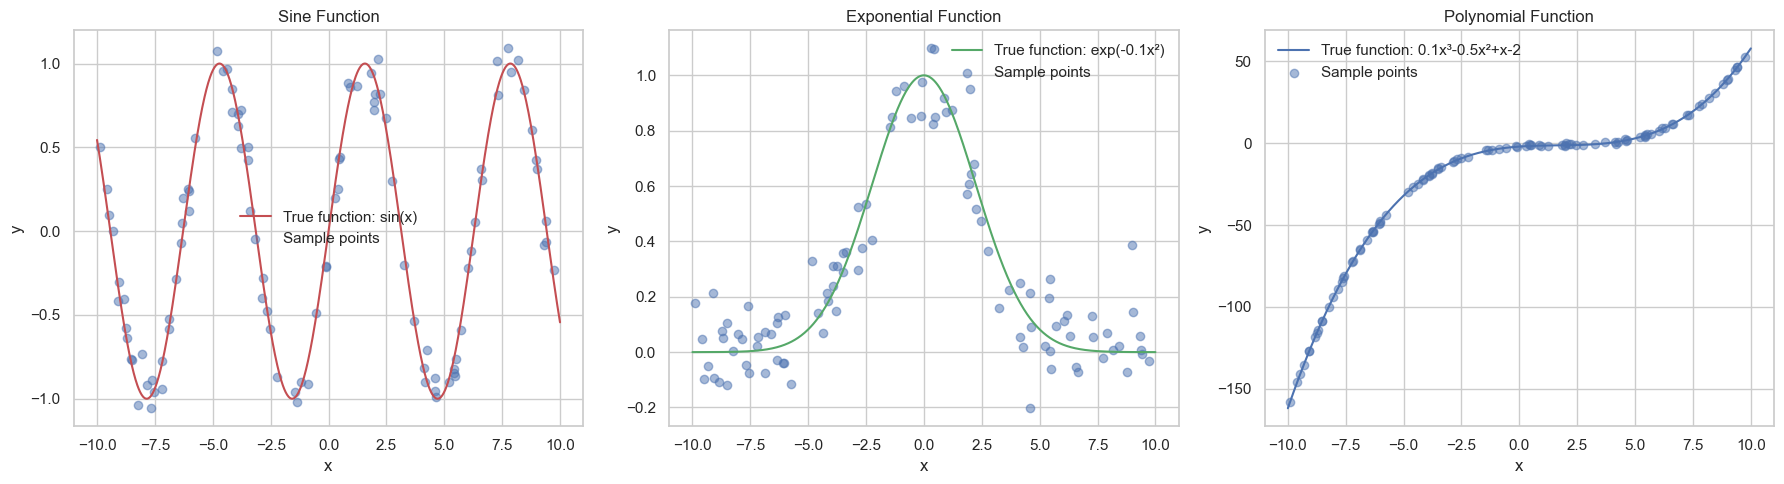

In [2]:
# Create a range of x values
x = np.linspace(-10, 10, 1000).reshape(-1, 1)

# Define several analytical functions
y_sin = np.sin(x)
y_exp = np.exp(-0.1 * x**2)
y_poly = 0.1 * x**3 - 0.5 * x**2 + x - 2

# Create sample points for training (with some noise)
np.random.seed(42)
x_sample = np.random.uniform(-10, 10, 100).reshape(-1, 1)
y_sin_sample = np.sin(x_sample) + np.random.normal(0, 0.1, size=x_sample.shape)
y_exp_sample = np.exp(-0.1 * x_sample**2) + np.random.normal(0, 0.1, size=x_sample.shape)
y_poly_sample = 0.1 * x_sample**3 - 0.5 * x_sample**2 + x_sample - 2 + np.random.normal(0, 0.5, size=x_sample.shape)

# Visualize the analytical functions and sample points
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(x, y_sin, 'r-', label='True function: sin(x)')
plt.scatter(x_sample, y_sin_sample, alpha=0.5, label='Sample points')
plt.title('Sine Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, y_exp, 'g-', label='True function: exp(-0.1x²)')
plt.scatter(x_sample, y_exp_sample, alpha=0.5, label='Sample points')
plt.title('Exponential Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, y_poly, 'b-', label='True function: 0.1x³-0.5x²+x-2')
plt.scatter(x_sample, y_poly_sample, alpha=0.5, label='Sample points')
plt.title('Polynomial Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()



### 2.2 Apply regression models to analytical functions



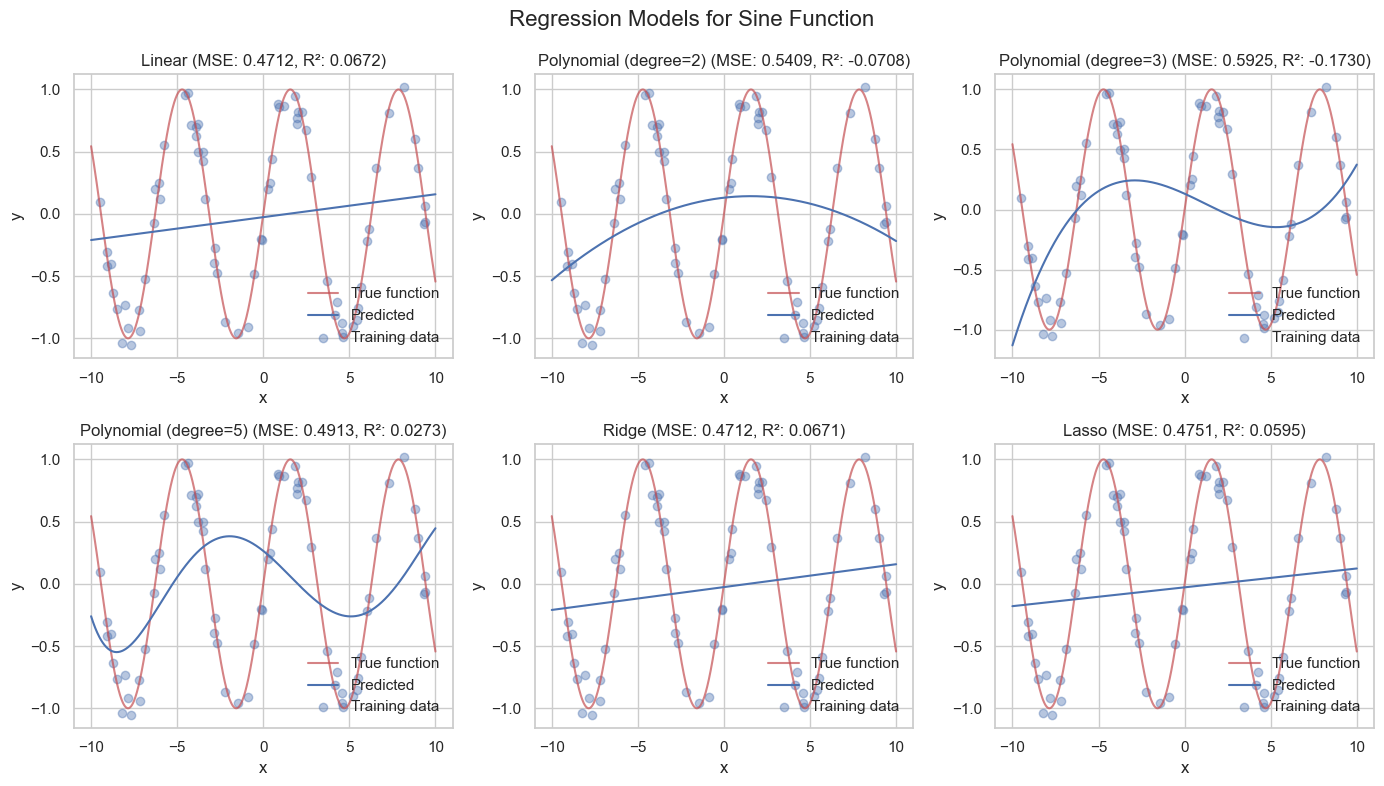

Results for Sine Function:
                            MSE        R²
Linear                 0.471203  0.067164
Polynomial (degree=2)  0.540893 -0.070801
Polynomial (degree=3)  0.592500 -0.172967
Polynomial (degree=5)  0.491338  0.027303
Ridge                  0.471212  0.067146
Lasso                  0.475066  0.059516


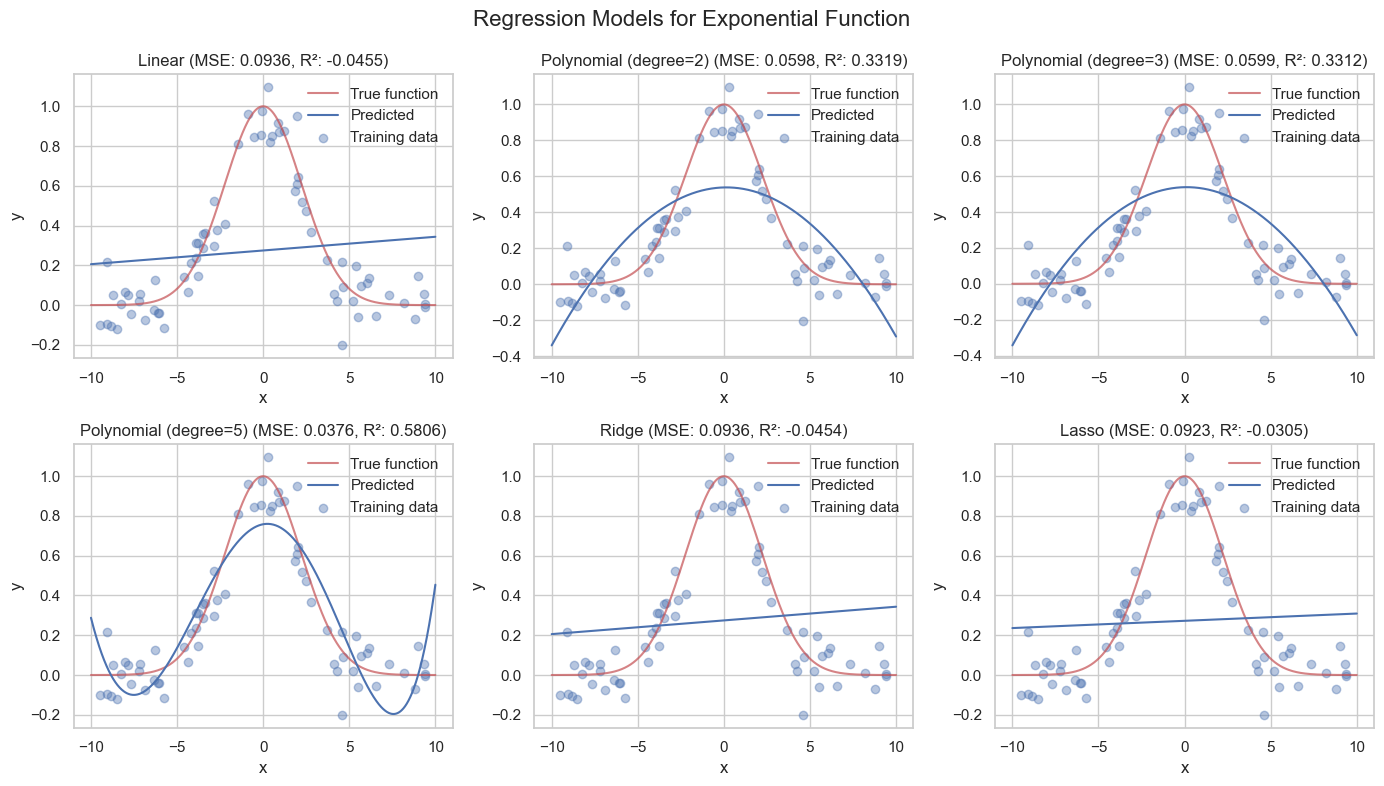

Results for Exponential Function:
                            MSE        R²
Linear                 0.093603 -0.045459
Polynomial (degree=2)  0.059819  0.331882
Polynomial (degree=3)  0.059876  0.331239
Polynomial (degree=5)  0.037553  0.580572
Ridge                  0.093601 -0.045439
Lasso                  0.092266 -0.030525


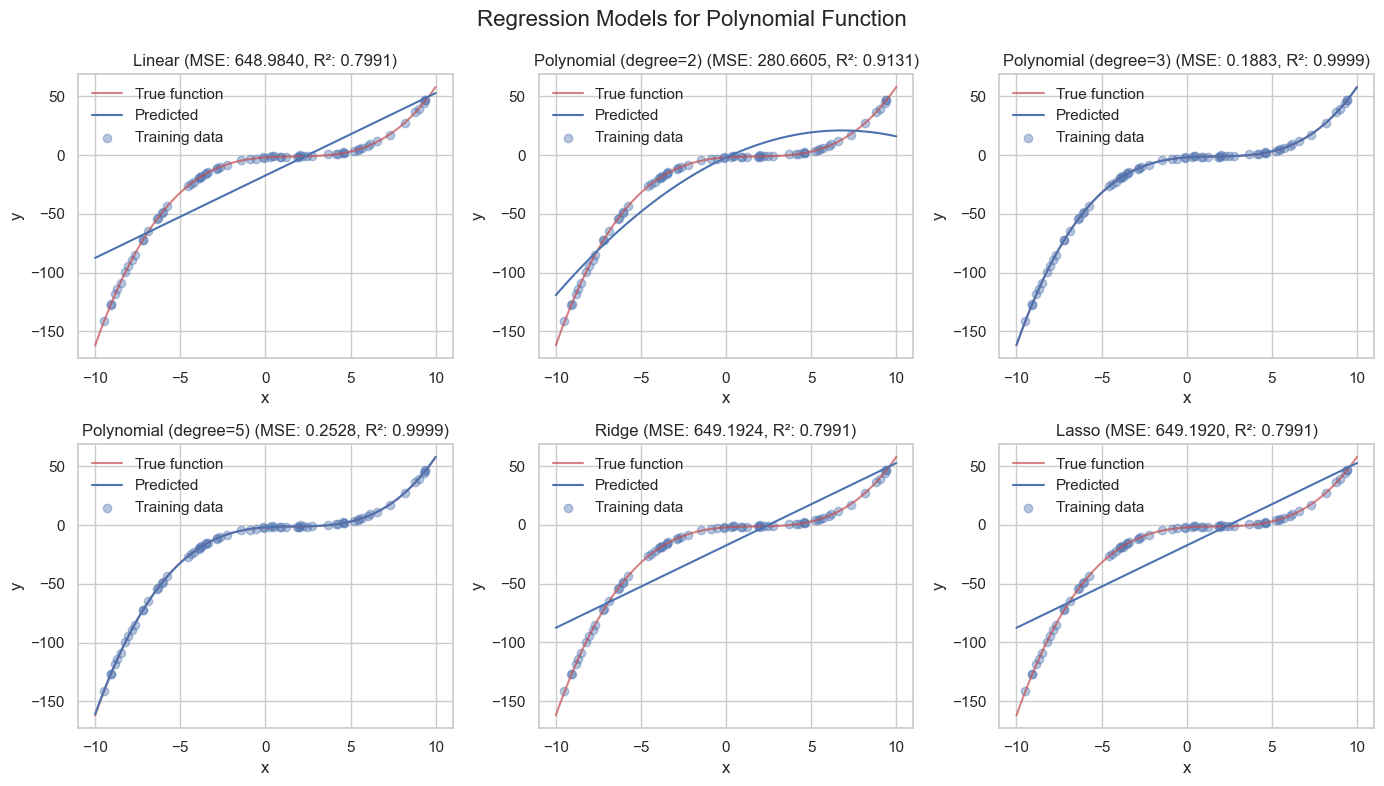

Results for Polynomial Function:
                              MSE        R²
Linear                 648.984024  0.799120
Polynomial (degree=2)  280.660488  0.913127
Polynomial (degree=3)    0.188337  0.999942
Polynomial (degree=5)    0.252771  0.999922
Ridge                  649.192378  0.799056
Lasso                  649.192040  0.799056


In [3]:
# Function to fit and evaluate regression models on analytical functions
def fit_regression_models(x_train, y_train, x_test, y_test, x_full, y_full, function_name):
    # Create models with different complexity
    models = {
        'Linear': LinearRegression(),
        'Polynomial (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        'Polynomial (degree=3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Polynomial (degree=5)': make_pipeline(PolynomialFeatures(degree=5), LinearRegression()),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1)
    }
    
    # Fit models and calculate predictions
    results = {}
    plt.figure(figsize=(14, 8))
    
    for i, (name, model) in enumerate(models.items()):
        # Fit the model
        model.fit(x_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(x_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'MSE': mse,
            'R2': r2,
            'Model': model
        }
        
        # Plot predictions on full range
        y_pred_full = model.predict(x_full)
        
        plt.subplot(2, 3, i+1)
        plt.plot(x_full, y_full, 'r-', alpha=0.7, label='True function')
        plt.plot(x_full, y_pred_full, 'b-', label='Predicted')
        plt.scatter(x_train, y_train, alpha=0.4, label='Training data')
        plt.title(f'{name} (MSE: {mse:.4f}, R²: {r2:.4f})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
    
    plt.suptitle(f'Regression Models for {function_name}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    # Display results in a table
    results_df = pd.DataFrame({name: {'MSE': res['MSE'], 'R²': res['R2']} for name, res in results.items()}).T
    print(f"Results for {function_name}:")
    return results_df

# Split data into train and test sets for each function
x_train_sin, x_test_sin, y_train_sin, y_test_sin = train_test_split(x_sample, y_sin_sample, test_size=0.3, random_state=42)
x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(x_sample, y_exp_sample, test_size=0.3, random_state=42)
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_sample, y_poly_sample, test_size=0.3, random_state=42)

# Apply models to each function
results_sin = fit_regression_models(x_train_sin, y_train_sin, x_test_sin, y_test_sin, x, y_sin, 'Sine Function')
print(results_sin)

results_exp = fit_regression_models(x_train_exp, y_train_exp, x_test_exp, y_test_exp, x, y_exp, 'Exponential Function')
print(results_exp)

results_poly = fit_regression_models(x_train_poly, y_train_poly, x_test_poly, y_test_poly, x, y_poly, 'Polynomial Function')
print(results_poly)



## 3. Part 2: Multivariate Synthetic Dataset Regression

### 3.1 Generate and visualize synthetic data



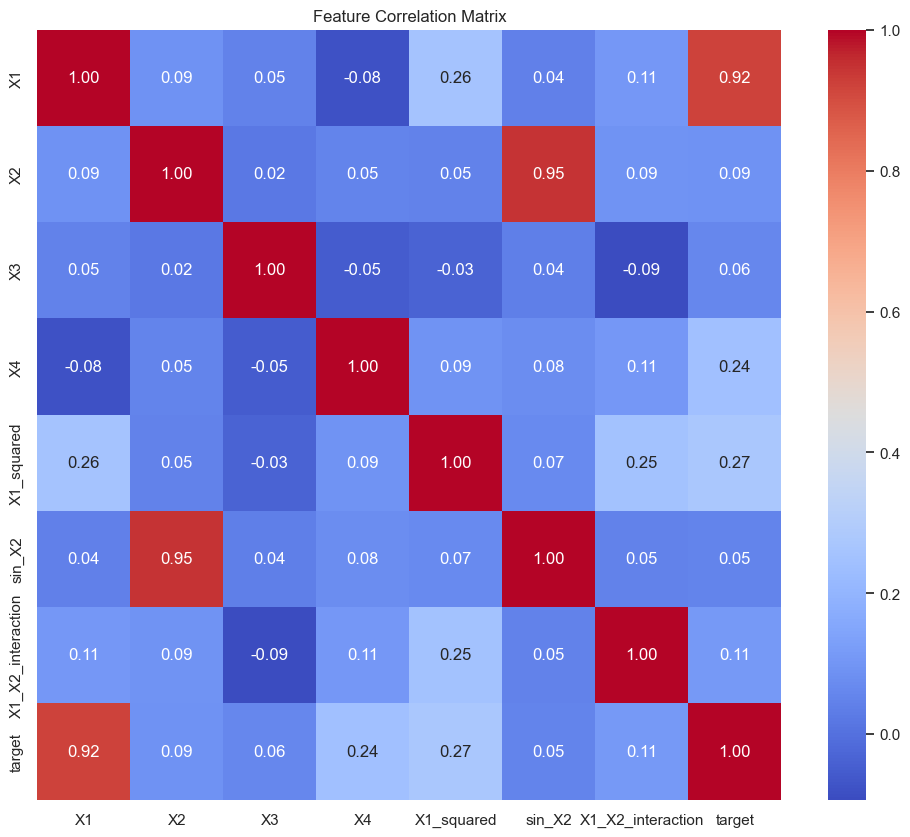

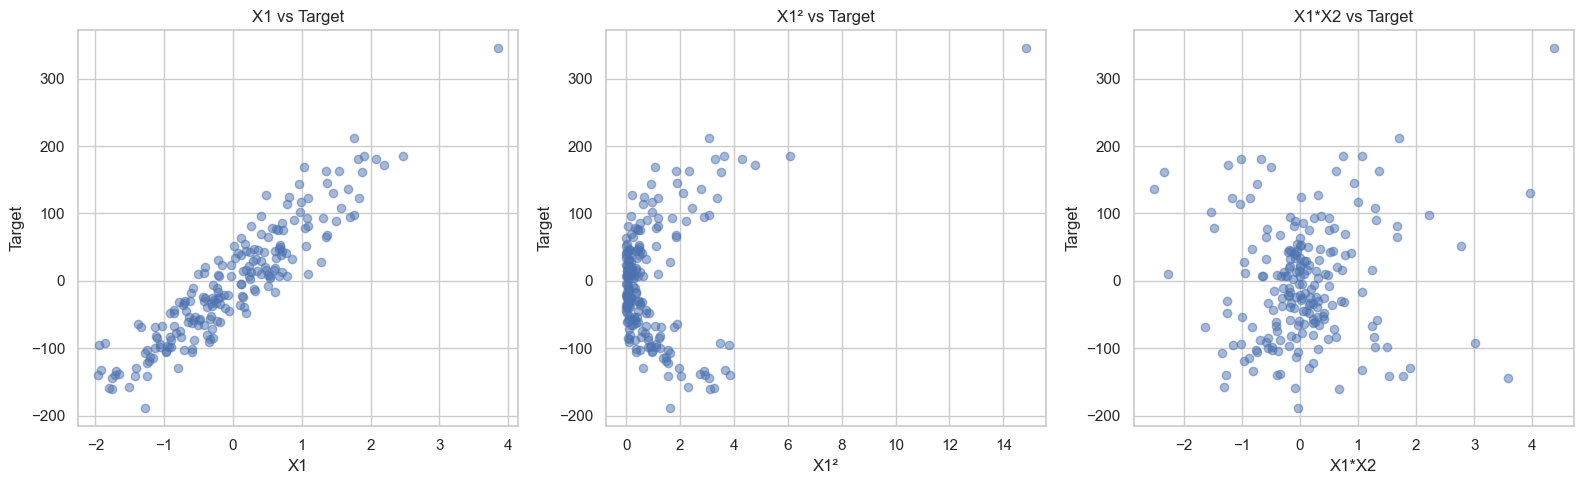

In [4]:
# Create a synthetic regression dataset with multiple features
X_synth, y_synth = make_regression(
    n_samples=200,
    n_features=4,
    n_informative=3,
    noise=20,
    random_state=42
)

# Add a non-linear feature
X_synth_extended = np.column_stack((
    X_synth,
    X_synth[:, 0]**2,  # Square of first feature
    np.sin(X_synth[:, 1]),  # Sine of second feature
    X_synth[:, 0] * X_synth[:, 1]  # Interaction term
))

# Split the data into training and testing sets
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth_extended, y_synth, test_size=0.3, random_state=42
)

# Create a DataFrame for easier analysis
feature_names = [f'X{i}' for i in range(1, 5)] + ['X1_squared', 'sin_X2', 'X1_X2_interaction']
df_synth = pd.DataFrame(X_synth_extended, columns=feature_names)
df_synth['target'] = y_synth

# Visualize feature relationships
plt.figure(figsize=(12, 10))
correlation = df_synth.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Visualize some key relationships
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_synth['X1'], df_synth['target'], alpha=0.5)
plt.title('X1 vs Target')
plt.xlabel('X1')
plt.ylabel('Target')

plt.subplot(1, 3, 2)
plt.scatter(df_synth['X1_squared'], df_synth['target'], alpha=0.5)
plt.title('X1² vs Target')
plt.xlabel('X1²')
plt.ylabel('Target')

plt.subplot(1, 3, 3)
plt.scatter(df_synth['X1_X2_interaction'], df_synth['target'], alpha=0.5)
plt.title('X1*X2 vs Target')
plt.xlabel('X1*X2')
plt.ylabel('Target')

plt.tight_layout()
plt.show()



### 3.2 Apply regression models to the multivariate dataset



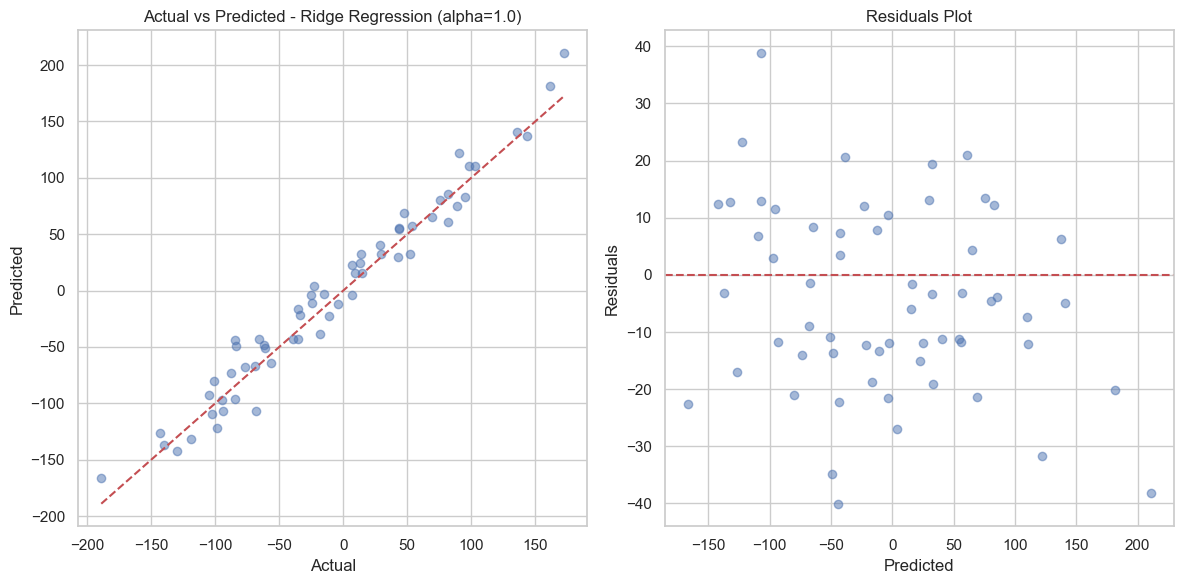

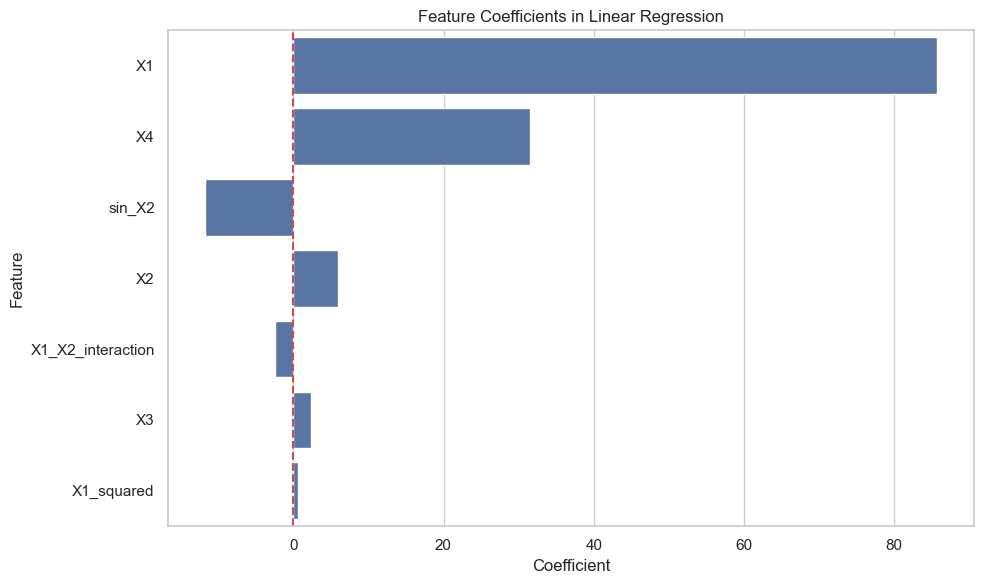

Results for Synthetic Multivariate Dataset:
                                Train MSE    Test MSE  Train R²   Test R²
Linear Regression              378.924487  292.422371  0.951396  0.956934
Ridge Regression (alpha=1.0)   379.641228  284.472695  0.951304  0.958105
Ridge Regression (alpha=0.1)   378.932338  291.509414  0.951395  0.957068
Lasso Regression (alpha=0.1)   379.580027  288.718499  0.951312  0.957479
Lasso Regression (alpha=0.01)  378.931168  292.002992  0.951395  0.956996


In [5]:
# Function to evaluate and compare regression models on synthetic data
def evaluate_regression_models(X_train, y_train, X_test, y_test):
    # Create different regression models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression (alpha=1.0)': Ridge(alpha=1.0),
        'Ridge Regression (alpha=0.1)': Ridge(alpha=0.1),
        'Lasso Regression (alpha=0.1)': Lasso(alpha=0.1),
        'Lasso Regression (alpha=0.01)': Lasso(alpha=0.01)
    }
    
    # Evaluate each model
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Store results
        results[name] = {
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Train R²': train_r2,
            'Test R²': test_r2,
            'Model': model
        }
    
    # Convert results to DataFrame for display
    results_df = pd.DataFrame({
        name: {
            'Train MSE': res['Train MSE'],
            'Test MSE': res['Test MSE'],
            'Train R²': res['Train R²'],
            'Test R²': res['Test R²']
        }
        for name, res in results.items()
    }).T
    
    # Plot actual vs predicted values for the best model
    best_model_name = results_df['Test R²'].idxmax()
    best_model = models[best_model_name]
    y_pred = best_model.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted - {best_model_name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # If using Linear Regression, show feature coefficients
    if 'Linear Regression' in models:
        linear_model = models['Linear Regression']
        coeffs = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': linear_model.coef_
        })
        coeffs = coeffs.sort_values('Coefficient', key=abs, ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=coeffs)
        plt.title('Feature Coefficients in Linear Regression')
        plt.axvline(x=0, color='r', linestyle='--')
        plt.tight_layout()
        plt.show()
    
    return results_df

# Evaluate models on synthetic data
results_synth = evaluate_regression_models(X_train_synth, y_train_synth, X_test_synth, y_test_synth)
print("Results for Synthetic Multivariate Dataset:")
print(results_synth)



## 4. Part 3: WWII Weather Data Regression

### 4.1 Load and preprocess the weather data



In [6]:
# Load the dataset
try:
    df = pd.read_csv('./weatherww2/SummaryofWeather.csv')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please download the dataset from Kaggle: https://www.kaggle.com/datasets/smid80/weatherww2")

# Filter for station ID 22508 (Honolulu, Hawaii)
station_id = 22508
hawaii_data = df[df['STA'] == station_id].copy()
print(f"Filtered data for station ID: {station_id} (Honolulu, Hawaii)")
print(f"Number of records: {len(hawaii_data)}")

# Convert date to datetime and sort
hawaii_data['Date'] = pd.to_datetime(hawaii_data['Date'])
hawaii_data = hawaii_data.sort_values('Date')

# Check for missing values in temperature columns
print("\nMissing values in temperature columns:")
print(hawaii_data[['MaxTemp', 'MinTemp', 'MeanTemp']].isnull().sum())

# Handle missing values in temperature columns
for col in ['MaxTemp', 'MinTemp', 'MeanTemp']:
    if hawaii_data[col].isnull().sum() > 0:
        hawaii_data[col] = hawaii_data[col].interpolate(method='time').ffill().bfill()

# Create day of year feature for seasonality
hawaii_data['DayOfYear'] = hawaii_data['Date'].dt.dayofyear
hawaii_data['Year'] = hawaii_data['Date'].dt.year
hawaii_data['Month'] = hawaii_data['Date'].dt.month

# Visualize temperature over time
plt.figure(figsize=(14, 6))
plt.plot(hawaii_data['Date'], hawaii_data['MeanTemp'], 'b-')
plt.title('Mean Temperature in Honolulu, Hawaii (1940-1945)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explore seasonal patterns
monthly_avg = hawaii_data.groupby(hawaii_data['Date'].dt.month)['MeanTemp'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

Error loading data: [Errno 2] No such file or directory: './weatherww2/SummaryofWeather.csv'
Please download the dataset from Kaggle: https://www.kaggle.com/datasets/smid80/weatherww2


NameError: name 'df' is not defined



### 4.2 Apply regression models to weather data



In [ ]:
# Create features for temperature prediction
# We'll predict MeanTemp based on various features

# Create features for regression
features = hawaii_data[['DayOfYear', 'Year']].copy()
target = hawaii_data['MeanTemp']

# Add sine and cosine transformations for cyclical day of year
features['sin_day'] = np.sin(2 * np.pi * features['DayOfYear'] / 365)
features['cos_day'] = np.cos(2 * np.pi * features['DayOfYear'] / 365)

# Add one-hot encoding for month
month_dummies = pd.get_dummies(hawaii_data['Month'], prefix='month', drop_first=True)
features = pd.concat([features, month_dummies], axis=1)

# Split data into train and test sets (chronological split)
train_end_date = pd.Timestamp('1944-01-01')
train_mask = hawaii_data['Date'] < train_end_date

X_train_weather = features[train_mask]
y_train_weather = target[train_mask]
X_test_weather = features[~train_mask]
y_test_weather = target[~train_mask]

print(f"Training data shape: {X_train_weather.shape}")
print(f"Testing data shape: {X_test_weather.shape}")

# Apply regression models to weather data
def evaluate_weather_models(X_train, y_train, X_test, y_test):
    # Define models to test
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.01),
        'Polynomial Regression (degree=2)': make_pipeline(
            PolynomialFeatures(degree=2, include_bias=False),
            LinearRegression()
        )
    }
    
    # Evaluate each model
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        results[name] = {
            'Train MSE': train_mse,
            'Train RMSE': train_rmse,
            'Train MAE': train_mae,
            'Train R²': train_r2,
            'Test MSE': test_mse,
            'Test RMSE': test_rmse,
            'Test MAE': test_mae,
            'Test R²': test_r2,
            'Model': model,
            'Test Predictions': y_test_pred
        }
    
    # Create results DataFrame
    metrics = ['Train MSE', 'Train RMSE', 'Train MAE', 'Train R²', 
               'Test MSE', 'Test RMSE', 'Test MAE', 'Test R²']
    
    results_df = pd.DataFrame({
        name: {metric: results[name][metric] for metric in metrics}
        for name in models.keys()
    }).T
    
    return results_df, results

# Evaluate weather prediction models
results_df_weather, results_dict_weather = evaluate_weather_models(
    X_train_weather, y_train_weather, X_test_weather, y_test_weather
)

print("Weather Temperature Prediction Model Results:")
print(results_df_weather)

# Visualize predictions from the best model
best_model_name = results_df_weather['Test R²'].idxmax()
y_test_pred = results_dict_weather[best_model_name]['Test Predictions']

# Create a DataFrame with actual and predicted values
test_dates = hawaii_data.loc[~train_mask, 'Date'].reset_index(drop=True)
prediction_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_weather.values,
    'Predicted': y_test_pred
})

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(prediction_df['Date'], prediction_df['Actual'], 'b-', label='Actual')
plt.plot(prediction_df['Date'], prediction_df['Predicted'], 'r-', label='Predicted')
plt.title(f'Temperature Prediction with {best_model_name}')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(prediction_df['Date'], prediction_df['Actual'] - prediction_df['Predicted'], 'g-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Error (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()



## 5. Comparison and Conclusion



In [ ]:
# Compare the performance of models across different datasets
def compare_model_performance():
    # Create a summary table of best models for each dataset
    best_models = {
        'Sine Function': results_sin['R²'].idxmax(),
        'Exponential Function': results_exp['R²'].idxmax(),
        'Polynomial Function': results_poly['R²'].idxmax(),
        'Synthetic Data': results_synth['Test R²'].idxmax(),
        'Weather Data': results_df_weather['Test R²'].idxmax()
    }
    
    best_r2 = {
        'Sine Function': results_sin.loc[best_models['Sine Function'], 'R²'],
        'Exponential Function': results_exp.loc[best_models['Exponential Function'], 'R²'],
        'Polynomial Function': results_poly.loc[best_models['Polynomial Function'], 'R²'],
        'Synthetic Data': results_synth.loc[best_models['Synthetic Data'], 'Test R²'],
        'Weather Data': results_df_weather.loc[best_models['Weather Data'], 'Test R²']
    }
    
    summary_df = pd.DataFrame({
        'Dataset': list(best_models.keys()),
        'Best Model': list(best_models.values()),
        'R² Score': list(best_r2.values())
    })
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    g = sns.barplot(x='Dataset', y='R² Score', data=summary_df, palette='viridis')
    
    # Add model names on top of bars
    for i, (model, score) in enumerate(zip(best_models.values(), best_r2.values())):
        model_name = model if len(model) < 15 else model[:12] + '...'
        g.text(i, score + 0.02, model_name, ha='center', va='bottom', rotation=45, fontsize=9)
    
    plt.title('Best Model Performance Across Datasets')
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return summary_df

summary = compare_model_performance()
print("Summary of Best Models:")
print(summary)

# Final conclusions
print("\nProject Conclusions:")
print("1. For simple analytical functions like sine and exponential, polynomial models of appropriate degree perform best")
print("2. For synthetic data with multiple features, linear and ridge regression models provide good performance")
print("3. For weather data with seasonal patterns, models that capture cyclical patterns perform better")
print("4. The key to successful regression modeling is understanding the underlying data patterns")



Similar code found with 1 license type